# Predicting IMDb Scores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Shaun Alex\\Downloads\\archive\\NetflixOriginals.csv", encoding='latin-1')
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [3]:
df.info

<bound method DataFrame.info of                                            Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Langua

In [4]:
df.describe

<bound method NDFrame.describe of                                            Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Lang

In [5]:
df.rename(columns = {'IMDB Score':'IMDBScore'}, inplace = True)
df

,Title,Genre,Premiere,Runtime,IMDBScore,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [6]:
df.isnull().sum()

Title        0
Genre        0
Premiere     0
Runtime      0
IMDBScore    0
Language     0
dtype: int64

In [7]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDBScore', 'Language'], dtype='object')

In [8]:
language=df['Language'].value_counts().sort_values(ascending=False)
language=language[:10]
language

English       401
Hindi          33
Spanish        31
French         20
Italian        14
Portuguese     12
Indonesian      9
Korean          6
Japanese        6
German          5
Name: Language, dtype: int64

In [9]:
Genre=df["Genre"].value_counts().sort_values(ascending=False)
Genre=Genre[:10]
Genre

Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         11
Biopic               9
Horror               9
Action               7
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Language vs Genre')

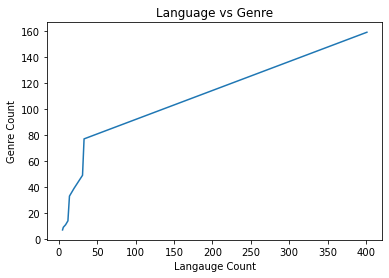

In [10]:
plt.plot(language,Genre)
plt.xlabel("Langauge Count")
plt.ylabel("Genre Count")
plt.title("Language vs Genre")

In [11]:
cols=["IMDBScore","Runtime"]
x=df[cols].head(12)

x.corr()

,IMDBScore,Runtime
IMDBScore,1.00000,0.40416
Runtime,0.40416,1.00000


<AxesSubplot:>

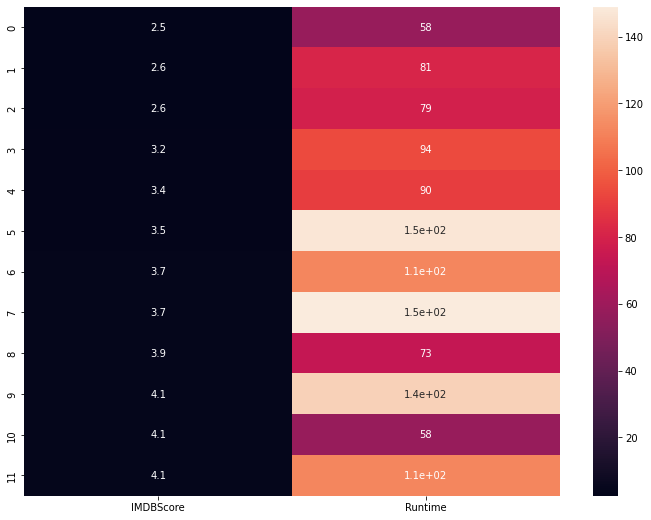

In [12]:
plt.figure(figsize=(12,9))
sns.heatmap(x,annot=True)

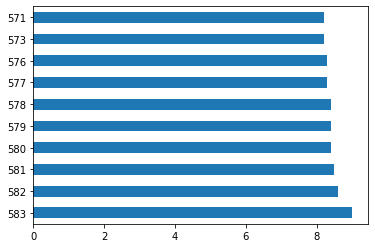

In [13]:
score=df["IMDBScore"].sort_values(ascending=False)[:10]
score.plot.barh()
plt.show()

<Figure size 2160x2160 with 0 Axes>

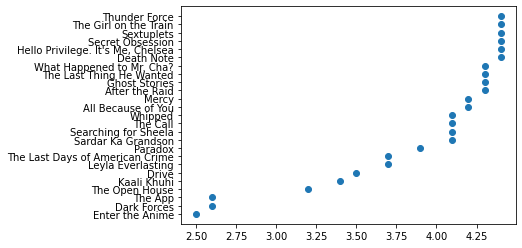

<Figure size 2160x2160 with 0 Axes>

In [14]:
plt.scatter(df["IMDBScore"][:25],df["Title"][:25])
plt.figure(figsize=(30,30))


In [15]:
from sklearn.preprocessing import LabelEncoder
object_cols = ["Title","Genre"]
label_encoder = LabelEncoder()
df2=df.copy()
for col in object_cols:
    label_encoder.fit(df2[col])
    df2[col] = label_encoder.transform(df2[col])
df2

,Title,Genre,Premiere,Runtime,IMDBScore,Language
0,147,45,"August 5, 2019",58,2.5,English/Japanese
1,120,106,"August 21, 2020",81,2.6,Spanish
2,433,93,"December 26, 2019",79,2.6,Italian
3,500,63,"January 19, 2018",94,3.2,English
4,243,73,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,425,40,"December 31, 2018",125,8.4,English
580,575,45,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,410,74,"December 16, 2018",153,8.5,English
582,145,45,"December 8, 2020",89,8.6,Portuguese


In [16]:
df2.drop(["Premiere"],axis=1,inplace=True)


In [17]:
df2.drop(["Language"],axis=1,inplace=True)


In [18]:
df2.drop(["IMDBScore"],axis=1,inplace=True)

df2


,Title,Genre,Runtime
0,147,45,58
1,120,106,81
2,433,93,79
3,500,63,94
4,243,73,90
...,...,...,...
579,425,40,125
580,575,45,91
581,410,74,153
582,145,45,89


In [19]:
y=df["IMDBScore"]
y

0      2.5
1      2.6
2      2.6
3      3.2
4      3.4
      ... 
579    8.4
580    8.4
581    8.5
582    8.6
583    9.0
Name: IMDBScore, Length: 584, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(df2,y,test_size=0.2,random_state=42)

In [22]:
print(xtrain.shape,ytrain.shape)

(467, 3) (467,)


In [23]:
print(xtest.shape,ytest.shape)

(117, 3) (117,)


In [24]:
lr=LinearRegression()

In [25]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [26]:
lr.fit(xtest,ytest)

LinearRegression()

In [27]:
lr.score(xtrain,ytrain)

0.031119103871776743

In [28]:
y_pred=lr.predict(xtest)
x=[[147,45,58]]
predict=lr.predict(x)
predict

C:\Users\Shaun Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.3065107])

In [29]:
print(lr.score(xtest, ytest))


0.019033211731675936


In [30]:
# Assuming df2 is your first DataFrame and df is your second DataFrame

# Filter rows in df2 where 'Title' is equal to 147
filtered_rows_df2 = df2[df2['Title'] == 147]

# Get the indices of the filtered rows
indices = filtered_rows_df2.index

# Use the indices to access the corresponding rows in df
resulting_rows_df = df.loc[indices]

# Now, resulting_rows_df contains the rows from df where 'Title' is equal to 147 in df2
resulting_rows_df


,Title,Genre,Premiere,Runtime,IMDBScore,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese


In [31]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
 
# fit the regressor with x and y data
regressor.fit(df2, y)

RandomForestRegressor(random_state=0)

In [32]:
Y_pred = regressor.predict(xtest)

In [33]:
print(regressor.score(xtest, ytest))


0.8844757926660178


In [34]:
print(regressor.score(xtrain, ytrain))

0.8848317625613643


In [35]:
x=[[147,45,58]]
predict=regressor.predict(x)
predict

C:\Users\Shaun Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.752])

In [36]:
from sklearn.metrics import accuracy_score



In [37]:
import numpy as np

# Assuming ytest is a Pandas Series
ytest_array = np.array(ytest)
reshaped_ytest = ytest_array.reshape(-1, 1)
print(reshaped_ytest)

ytpred_array = np.array(y_pred)
reshaped_ypred = ytpred_array.reshape(-1, 1)
print(reshaped_ypred)


[[6.7]
 [6.9]
 [5.3]
 [7.1]
 [7.4]
 [6.4]
 [5.5]
 [6.2]
 [5.6]
 [6.6]
 [7.6]
 [5.2]
 [7.9]
 [5.8]
 [6.9]
 [6.1]
 [6. ]
 [5.4]
 [8.2]
 [5.8]
 [6.6]
 [6. ]
 [2.6]
 [7.7]
 [7.3]
 [5.1]
 [5. ]
 [8.4]
 [7. ]
 [4.6]
 [5.7]
 [6.9]
 [5.2]
 [6.2]
 [5.2]
 [6.4]
 [6.9]
 [6.7]
 [7.1]
 [7.6]
 [6.2]
 [6. ]
 [5.8]
 [4.1]
 [6.9]
 [6.6]
 [3.7]
 [7.2]
 [7.2]
 [7.2]
 [5.4]
 [5.8]
 [5.2]
 [5.8]
 [5.9]
 [6.1]
 [7.6]
 [6.8]
 [7.1]
 [7. ]
 [5.2]
 [6.1]
 [6.5]
 [4.6]
 [5.2]
 [6.4]
 [6.2]
 [6.9]
 [6.5]
 [4.7]
 [5.7]
 [6.5]
 [5.7]
 [5.2]
 [6.7]
 [6.8]
 [5.1]
 [5.2]
 [5.9]
 [7.6]
 [6.8]
 [4.1]
 [5.3]
 [6.6]
 [7.1]
 [5.2]
 [7.1]
 [7. ]
 [6.3]
 [6.3]
 [5.6]
 [7.4]
 [5.7]
 [5.9]
 [6.8]
 [7.3]
 [6.4]
 [4.1]
 [6.5]
 [7.4]
 [6.6]
 [8.1]
 [6.2]
 [5.3]
 [7.3]
 [8.4]
 [6.1]
 [7.6]
 [5.6]
 [5.8]
 [5.7]
 [5.5]
 [6.4]
 [7.8]
 [5.8]
 [7.7]
 [6.6]]
[[6.27382178]
 [6.18355707]
 [6.19582461]
 [6.32318729]
 [6.33536972]
 [6.29376888]
 [6.33360645]
 [6.37218645]
 [6.11885599]
 [6.00921432]
 [6.24897547]
 [6.24424084]
 [6.22748239

In [38]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error,r2_score


In [39]:
mse = mean_squared_error(ytest, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
r2_score=r2_score(ytest,y_pred)  # For the Linear Regression
print(rmse,mse,r2_score)

1.0090520571992603 1.0181860541380592 0.019033211731675936


In [40]:
Y_pred1 = Y_pred.astype(int)
Y_pred1

array([6, 6, 5, 6, 7, 6, 5, 5, 5, 6, 7, 5, 7, 5, 6, 6, 5, 5, 8, 6, 7, 5,
       3, 7, 7, 5, 5, 7, 6, 4, 5, 6, 5, 6, 5, 5, 6, 7, 7, 7, 6, 6, 6, 5,
       7, 6, 4, 6, 6, 6, 5, 6, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 5, 5, 6,
       5, 7, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 7, 6, 4, 5, 6, 7, 5, 6, 7,
       6, 6, 6, 7, 5, 6, 6, 6, 6, 4, 6, 7, 6, 7, 6, 5, 6, 7, 6, 6, 5, 5,
       5, 5, 6, 7, 5, 7, 6])

In [41]:

mse = mean_squared_error(ytest, Y_pred1)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(rmse,mse)


0.6717116801102846 0.45119658119658124


In [42]:
from sklearn.metrics import r2_score

# Assuming ytest contains actual labels and Y_pred1 contains predicted labels
r2_result = r2_score(ytest, Y_pred1)  # Calculate the R^2 score
r2_result


0.565296677031442

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples required at each leaf node
}
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [44]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_regressor = grid_search.best_estimator_
best_rf_regressor.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = best_rf_regressor.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 0.7810925200023665
Root Mean Squared Error: 0.8837943878540792
R-squared: 0.24745991405688794


# Neural Network

In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


In [46]:
x = df[['Genre', 'Runtime', 'Language']]
y = df['IMDBScore']

# Encode categorical variables (Genre and Language) using one-hot encoding
x = pd.get_dummies(x, columns=['Genre', 'Language'], drop_first=True)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features (optional but can help neural networks converge faster)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, mae = model.evaluate(x_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

# Make predictions
y_pred = model.predict(x_test)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 33.8856 - mean_absolute_error: 5.6779 - val_loss: 27.4807 - val_mean_absolute_error: 5.0510
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 21.2297 - mean_absolute_error: 4.2941 - val_loss: 18.0831 - val_mean_absolute_error: 3.9985
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 13.4957 - mean_absolute_error: 3.2651 - val_loss: 11.0699 - val_mean_absolute_error: 3.0246
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 9.1994 - mean_absolute_error: 2.7003 - val_loss: 6.8790 - val_mean_absolute_error: 2.3458
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 6.3300 - mean_absolute_error: 2.2119 - val_loss: 5.0011 - val_mean_absolute_error: 1.9747
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 3.9276 - mean_absolute_error: 1.7099 - val_loss: 4.1505 - val_mean_absolute_error: 1.7069
Epoch 7/100
12/

Epoch 51/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2764 - mean_absolute_error: 0.3638 - val_loss: 3.7496 - val_mean_absolute_error: 1.2493
Epoch 52/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2732 - mean_absolute_error: 0.3563 - val_loss: 3.7515 - val_mean_absolute_error: 1.2521
Epoch 53/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2783 - mean_absolute_error: 0.3611 - val_loss: 3.7602 - val_mean_absolute_error: 1.2547
Epoch 54/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2743 - mean_absolute_error: 0.3557 - val_loss: 3.7544 - val_mean_absolute_error: 1.2490
Epoch 55/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2771 - mean_absolute_error: 0.3601 - val_loss: 3.7577 - val_mean_absolute_error: 1.2517
Epoch 56/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2759 - mean_absolute_error: 0.3616 - val_loss: 3.7413 - val_mean_absolute_error: 1.2482
Epoch 57/100
12/

4/4 [==============================] - 0s 2ms/step - loss: 1.4593 - mean_absolute_error: 0.8817
Mean Absolute Error on Test Set: 0.8817167282104492
4/4 [==============================] - 0s 2ms/step


In [47]:
y_pred

array([[6.03637   ],
       [5.601603  ],
       [5.5962715 ],
       [6.932173  ],
       [6.819642  ],
       [7.0490417 ],
       [5.909452  ],
       [5.3236194 ],
       [6.5592623 ],
       [5.440313  ],
       [7.1735015 ],
       [7.0880504 ],
       [7.0843143 ],
       [5.3240213 ],
       [6.6149597 ],
       [5.327671  ],
       [4.8287206 ],
       [5.0816717 ],
       [7.204135  ],
       [5.065432  ],
       [7.089703  ],
       [5.931197  ],
       [5.0677137 ],
       [7.2144322 ],
       [6.9574523 ],
       [4.1980186 ],
       [6.0151467 ],
       [7.2558537 ],
       [4.817285  ],
       [5.5669866 ],
       [5.838111  ],
       [5.3329544 ],
       [5.333306  ],
       [6.3641696 ],
       [4.71304   ],
       [5.949777  ],
       [7.1264496 ],
       [7.089703  ],
       [6.669211  ],
       [7.146363  ],
       [7.3099885 ],
       [6.209689  ],
       [5.336598  ],
       [6.932173  ],
       [7.117263  ],
       [7.0621433 ],
       [5.557983  ],
       [5.081

# Gradient Boosting

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
# data = pd.read_csv("NetflixOriginals.csv")

# Preprocess the data
# Assuming you want to use 'Genre', 'Runtime', and 'Language' as features
X = df[['Genre', 'Runtime', 'Language']]
y = df['IMDBScore']

# Encode categorical variables (Genre and Language) using Label Encoding
label_encoders = {}
for col in ['Genre', 'Language']:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can help gradient boosting)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the gradient boosting model
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error: 0.6737418660432508
Mean Squared Error: 0.7646858702215756
R-squared (R2): 0.2632668272200527


C:\Users\Shaun Alex\AppData\Local\Temp\ipykernel_28416\1193338420.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoders[col].fit_transform(X[col])


# Data Preprocessing

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
data = df2.join(y)
data

,Title,Genre,Runtime,IMDBScore
0,147,45,58,2.5
1,120,106,81,2.6
2,433,93,79,2.6
3,500,63,94,3.2
4,243,73,90,3.4
...,...,...,...,...
579,425,40,125,8.4
580,575,45,91,8.4
581,410,74,153,8.5
582,145,45,89,8.6


In [51]:
scaler = StandardScaler()
model = scaler.fit(data)
scaled_data = model.transform(data)
scaled_data

array([[-0.85712914, -0.30324457, -1.28261511, -3.85494543],
       [-1.01728476,  2.00257926, -0.45342484, -3.75273959],
       [ 0.83933407,  1.51117418, -0.52552834, -3.75273959],
       ...,
       [ 0.70290521,  0.79296676,  2.1423012 ,  2.27740523],
       [-0.86899252, -0.30324457, -0.16501084,  2.37961107],
       [-1.01135307, -0.30324457, -0.38132134,  2.78843445]])

In [52]:
data.isnull().sum()

Title        0
Genre        0
Runtime      0
IMDBScore    0
dtype: int64

In [53]:
data.dropna()

,Title,Genre,Runtime,IMDBScore
0,147,45,58,2.5
1,120,106,81,2.6
2,433,93,79,2.6
3,500,63,94,3.2
4,243,73,90,3.4
...,...,...,...,...
579,425,40,125,8.4
580,575,45,91,8.4
581,410,74,153,8.5
582,145,45,89,8.6


In [54]:
data.sort_values(by='IMDBScore', ascending = False)

,Title,Genre,Runtime,IMDBScore
583,121,45,83,9.0
582,145,45,89,8.6
581,410,74,153,8.5
580,575,45,91,8.4
579,425,40,125,8.4
...,...,...,...,...
4,243,73,90,3.4
3,500,63,94,3.2
2,433,93,79,2.6
1,120,106,81,2.6


In [55]:
data.sort_values(by='IMDBScore', ascending = False).head()

,Title,Genre,Runtime,IMDBScore
583,121,45,83,9.0
582,145,45,89,8.6
581,410,74,153,8.5
580,575,45,91,8.4
579,425,40,125,8.4


In [56]:
data.isna()

,Title,Genre,Runtime,IMDBScore
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
579,False,False,False,False
580,False,False,False,False
581,False,False,False,False
582,False,False,False,False


In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler1 = MinMaxScaler()
model1 = scaler1.fit(data)
scaled_data1 = model.transform(data)
scaled_data1

array([[-0.85712914, -0.30324457, -1.28261511, -3.85494543],
       [-1.01728476,  2.00257926, -0.45342484, -3.75273959],
       [ 0.83933407,  1.51117418, -0.52552834, -3.75273959],
       ...,
       [ 0.70290521,  0.79296676,  2.1423012 ,  2.27740523],
       [-0.86899252, -0.30324457, -0.16501084,  2.37961107],
       [-1.01135307, -0.30324457, -0.38132134,  2.78843445]])

# Univariate Analysis

In [59]:
column1 = df['Runtime']
column1

0       58
1       81
2       79
3       94
4       90
      ... 
579    125
580     91
581    153
582     89
583     83
Name: Runtime, Length: 584, dtype: int64

In [60]:
column1.head()

0    58
1    81
2    79
3    94
4    90
Name: Runtime, dtype: int64

In [61]:
column1.dropna()

0       58
1       81
2       79
3       94
4       90
      ... 
579    125
580     91
581    153
582     89
583     83
Name: Runtime, Length: 584, dtype: int64

In [62]:
column1.fillna('Nan')

0       58
1       81
2       79
3       94
4       90
      ... 
579    125
580     91
581    153
582     89
583     83
Name: Runtime, Length: 584, dtype: int64

In [63]:
column1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 584 entries, 0 to 583
Series name: Runtime
Non-Null Count  Dtype
--------------  -----
584 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [64]:
column1.describe()

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: Runtime, dtype: float64

<AxesSubplot:>

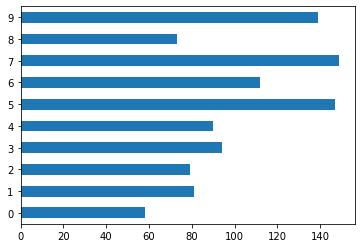

In [65]:
column11=column1.head(10)
column11.plot.barh()

# Bivariate Analysis

In [66]:
df.groupby('Genre').agg({'IMDBScore':'mean'})

,IMDBScore
Genre,
Action,5.414286
Action comedy,5.420000
Action thriller,6.400000
Action-adventure,7.300000
Action-thriller,6.133333
...,...
War,6.750000
War drama,7.100000
War-Comedy,6.000000


In [67]:
df.groupby('Runtime').agg({'IMDBScore':'mean'})

,IMDBScore
Runtime,
4,4.70
7,6.90
9,6.50
10,5.20
11,7.20
...,...
149,6.20
151,6.25
153,8.50


In [68]:
df.groupby('Premiere').agg({'IMDBScore':'mean'})

,IMDBScore
Premiere,
"April 1, 2021",6.10
"April 10, 2020",6.00
"April 12, 2019",5.55
"April 13, 2018",6.15
"April 14, 2017",5.20
...,...
"September 4, 2020",6.60
"September 7, 2018",6.20
"September 7, 2020",8.10


In [69]:
df.groupby('Title').agg({'IMDBScore':'mean'})

,IMDBScore
Title,
#REALITYHIGH,5.2
13th,8.2
13th: A Conversation with Oprah Winfrey & Ava DuVernay,7.1
15 August,5.8
1922,6.3
...,...
Yes Day,5.7
You've Got This,5.8
Zion,7.2


In [70]:
df.groupby('Language').agg({'IMDBScore':'mean'})

,IMDBScore
Language,
Bengali,7.100000
Dutch,5.800000
English,6.380050
English/Akan,7.700000
English/Arabic,7.300000
English/Hindi,7.300000
English/Japanese,4.400000
English/Korean,7.300000
English/Mandarin,7.050000


# Feature Engineering

## Imputation

In [71]:
from sklearn.impute import SimpleImputer

In [72]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
df_imputed

,Title,Genre,Runtime
0,147.0,45.0,58.0
1,120.0,106.0,81.0
2,433.0,93.0,79.0
3,500.0,63.0,94.0
4,243.0,73.0,90.0
...,...,...,...
579,425.0,40.0,125.0
580,575.0,45.0,91.0
581,410.0,74.0,153.0
582,145.0,45.0,89.0


## Outliers

In [73]:
import numpy as np

# Sample dataset
data=df["IMDBScore"]

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define a lower bound and upper bound to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect and handle outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]

# Print the outliers and the modified dataset
print("Outliers:", outliers)
data_no_outliers = [x for x in data if lower_bound <= x <= upper_bound]
print("Data without outliers:", data_no_outliers)

Outliers: [2.5, 2.6, 2.6, 3.2, 3.4, 3.5, 3.7, 3.7, 9.0]
Data without outliers: [3.9, 4.1, 4.1, 4.1, 4.1, 4.2, 4.2, 4.3, 4.3, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.9, 

## Log Transformation

In [74]:
import numpy as np

# Sample dataset
# Apply log transformation
log_transformed_data = np.log(data)

# Print original and log-transformed data
print("Original Data:", data)
print("Log-Transformed Data:", log_transformed_data)

Original Data: 0      2.5
1      2.6
2      2.6
3      3.2
4      3.4
      ... 
579    8.4
580    8.4
581    8.5
582    8.6
583    9.0
Name: IMDBScore, Length: 584, dtype: float64
Log-Transformed Data: 0      0.916291
1      0.955511
2      0.955511
3      1.163151
4      1.223775
         ...   
579    2.128232
580    2.128232
581    2.140066
582    2.151762
583    2.197225
Name: IMDBScore, Length: 584, dtype: float64


## One Hot Encoding

In [75]:
df2=df.copy()

In [76]:
from sklearn.preprocessing import LabelEncoder
object_cols = ["Title","Genre"] # doing one hor encoding for Columns Title and Genre
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df2[col])
    df2[col] = label_encoder.transform(df2[col])
df2

,Title,Genre,Premiere,Runtime,IMDBScore,Language
0,147,45,"August 5, 2019",58,2.5,English/Japanese
1,120,106,"August 21, 2020",81,2.6,Spanish
2,433,93,"December 26, 2019",79,2.6,Italian
3,500,63,"January 19, 2018",94,3.2,English
4,243,73,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,425,40,"December 31, 2018",125,8.4,English
580,575,45,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,410,74,"December 16, 2018",153,8.5,English
582,145,45,"December 8, 2020",89,8.6,Portuguese


## Scaling

In [77]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler


data1 = data.to_numpy()
data1=data1.reshape(-1,1)

# Scaling (Min-Max scaling)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data1)



# Print results
print("Original DataFrame:")
print(data1)
print("\nScaled DataFrame (Min-Max scaling):")
print(pd.DataFrame(scaled_data1, columns=data1.columns))

Original DataFrame:
[[2.5]
 [2.6]
 [2.6]
 [3.2]
 [3.4]
 [3.5]
 [3.7]
 [3.7]
 [3.9]
 [4.1]
 [4.1]
 [4.1]
 [4.1]
 [4.2]
 [4.2]
 [4.3]
 [4.3]
 [4.3]
 [4.3]
 [4.4]
 [4.4]
 [4.4]
 [4.4]
 [4.4]
 [4.4]
 [4.5]
 [4.5]
 [4.5]
 [4.5]
 [4.6]
 [4.6]
 [4.6]
 [4.6]
 [4.6]
 [4.6]
 [4.6]
 [4.6]
 [4.7]
 [4.7]
 [4.7]
 [4.7]
 [4.7]
 [4.7]
 [4.8]
 [4.8]
 [4.8]
 [4.8]
 [4.8]
 [4.8]
 [4.8]
 [4.9]
 [4.9]
 [4.9]
 [4.9]
 [5. ]
 [5. ]
 [5. ]
 [5. ]
 [5. ]
 [5.1]
 [5.1]
 [5.1]
 [5.1]
 [5.1]
 [5.1]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.2]
 [5.3]
 [5.3]
 [5.3]
 [5.3]
 [5.3]
 [5.3]
 [5.3]
 [5.3]
 [5.3]
 [5.3]
 [5.4]
 [5.4]
 [5.4]
 [5.4]
 [5.4]
 [5.4]
 [5.4]
 [5.4]
 [5.4]
 [5.4]
 [5.4]
 [5.4]
 [5.4]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.5]
 [5.6]
 [5.6]
 [5.6]
 [5.6]
 [5.6]
 [5.6]
 [5.6]
 [5.6]
 [5.6]
 [5.6]
 [5.6]
 [5.6]
 [5.6]
 [5.6]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## Normalization

In [78]:
data=df["IMDBScore"].to_numpy()
# Sample data
data = data.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to normalize it
normalized_data = scaler.fit_transform(data)

# Print the normalized data
print(normalized_data)

[[-3.85494543]
 [-3.75273959]
 [-3.75273959]
 [-3.13950452]
 [-2.93509283]
 [-2.83288699]
 [-2.6284753 ]
 [-2.6284753 ]
 [-2.42406361]
 [-2.21965192]
 [-2.21965192]
 [-2.21965192]
 [-2.21965192]
 [-2.11744608]
 [-2.11744608]
 [-2.01524024]
 [-2.01524024]
 [-2.01524024]
 [-2.01524024]
 [-1.91303439]
 [-1.91303439]
 [-1.91303439]
 [-1.91303439]
 [-1.91303439]
 [-1.91303439]
 [-1.81082855]
 [-1.81082855]
 [-1.81082855]
 [-1.81082855]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.60641686]
 [-1.60641686]
 [-1.60641686]
 [-1.60641686]
 [-1.60641686]
 [-1.60641686]
 [-1.50421101]
 [-1.50421101]
 [-1.50421101]
 [-1.50421101]
 [-1.50421101]
 [-1.50421101]
 [-1.50421101]
 [-1.40200517]
 [-1.40200517]
 [-1.40200517]
 [-1.40200517]
 [-1.29979933]
 [-1.29979933]
 [-1.29979933]
 [-1.29979933]
 [-1.29979933]
 [-1.19759348]
 [-1.19759348]
 [-1.19759348]
 [-1.19759348]
 [-1.19759348]
 [-1.19759348]
 [-1.09538764]
 [-1.09538

## Standardization

In [79]:
# Sample data

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to standardize it
standardized_data = scaler.fit_transform(data)

# Print the standardized data
print(standardized_data)

[[-3.85494543]
 [-3.75273959]
 [-3.75273959]
 [-3.13950452]
 [-2.93509283]
 [-2.83288699]
 [-2.6284753 ]
 [-2.6284753 ]
 [-2.42406361]
 [-2.21965192]
 [-2.21965192]
 [-2.21965192]
 [-2.21965192]
 [-2.11744608]
 [-2.11744608]
 [-2.01524024]
 [-2.01524024]
 [-2.01524024]
 [-2.01524024]
 [-1.91303439]
 [-1.91303439]
 [-1.91303439]
 [-1.91303439]
 [-1.91303439]
 [-1.91303439]
 [-1.81082855]
 [-1.81082855]
 [-1.81082855]
 [-1.81082855]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.7086227 ]
 [-1.60641686]
 [-1.60641686]
 [-1.60641686]
 [-1.60641686]
 [-1.60641686]
 [-1.60641686]
 [-1.50421101]
 [-1.50421101]
 [-1.50421101]
 [-1.50421101]
 [-1.50421101]
 [-1.50421101]
 [-1.50421101]
 [-1.40200517]
 [-1.40200517]
 [-1.40200517]
 [-1.40200517]
 [-1.29979933]
 [-1.29979933]
 [-1.29979933]
 [-1.29979933]
 [-1.29979933]
 [-1.19759348]
 [-1.19759348]
 [-1.19759348]
 [-1.19759348]
 [-1.19759348]
 [-1.19759348]
 [-1.09538764]
 [-1.09538

# Plot for Feature Engineering

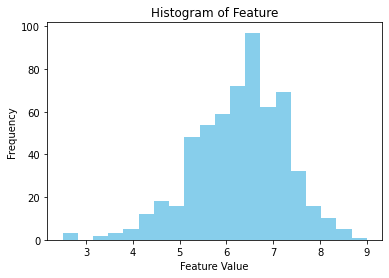

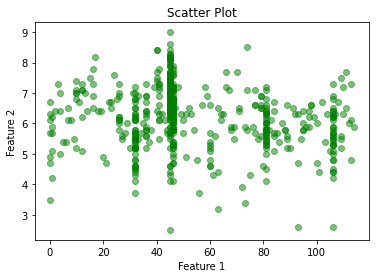

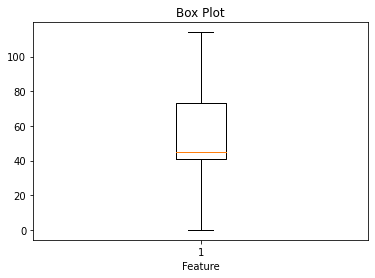

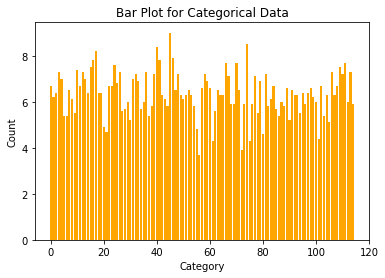

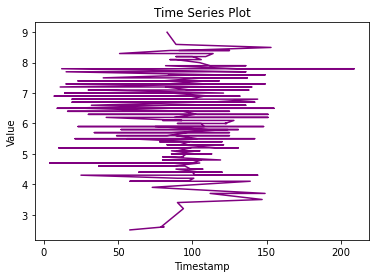

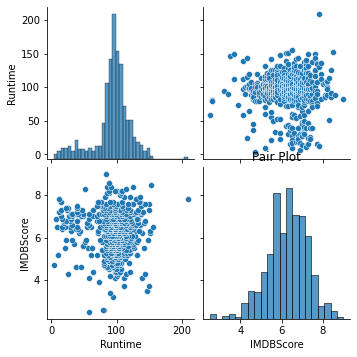

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with your data

# 1. Histogram
plt.hist(df2['IMDBScore'], bins=20, color='skyblue')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

# 2. Scatter Plot
plt.scatter(df2['Genre'], df2['IMDBScore'], alpha=0.5, c='green')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot')
plt.show()

# 3. Box Plot
plt.boxplot(df2['Genre'])
plt.xlabel('Feature')
plt.title('Box Plot')
plt.show()


# 5. Bar Plot for Categorical Data
plt.bar(df2['Genre'], df['IMDBScore'], color='orange')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot for Categorical Data')
plt.show()

# 6. Time Series Plot (assuming a time-series dataset)
plt.plot(df['Runtime'], df['IMDBScore'], color='purple')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.show()

# 7. Pair Plot (for a selection of features)
import seaborn as sns
features = ['Genre', 'Runtime', 'IMDBScore']
sns.pairplot(df[features])
plt.title('Pair Plot')
plt.show()


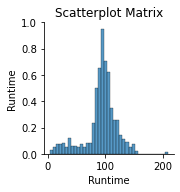

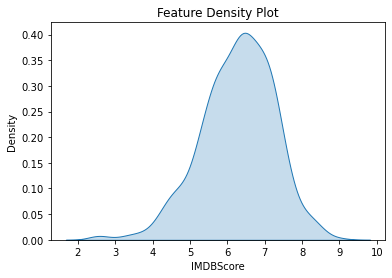

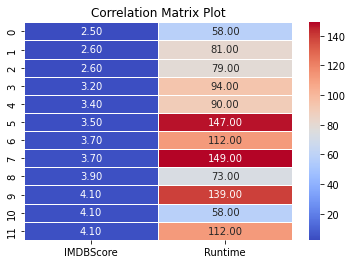

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for scatter plots

# Assuming you have a DataFrame 'df' with your data

# 1. Scatterplot Matrix
features = ['Genre', 'Runtime']  # Replace with your feature names
sns.pairplot(df[features])
plt.title('Scatterplot Matrix')
plt.show()

# 2. Feature Density Plot
feature = 'IMDBScore'  # Replace with your feature name
sns.kdeplot(df2[feature], shade=True)
plt.title('Feature Density Plot')
plt.show()

# 3. Correlation Matrix Plot
x=df[cols].head(12)
sns.heatmap(x, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Plot')
plt.show()

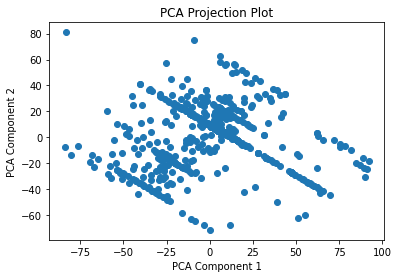

In [87]:
from sklearn.decomposition import PCA

# Assuming you have a DataFrame 'df' with your data

# Specify the features you want to include in the PCA
features = ['Genre', 'Runtime']  # Replace with your feature names

# Standardize the data (if necessary)
# You can use a StandardScaler from scikit-learn
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[features] = scaler.fit_transform(df[features])

# Create a PCA model and fit it to your data
pca = PCA(n_components=2)  # You can choose the number of components
pca_result = pca.fit_transform(df2[features])
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection Plot')
plt.show()

# Model Training

## Linear Regression

In [88]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create and train the model (linear regression in this case)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.8778747725462929
R-squared: 0.027707099323870277


## Decision Tree

In [89]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create and train the decision tree model with adjusted hyperparameters
model = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.8258483907246518
R-squared: 0.08532907830650449


## Random Forest

In [90]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.8215188404881246
R-squared: 0.09012428496893776


## Gradient boosting model

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can help gradient boosting)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the gradient boosting model
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error: 0.6737418660432508
Mean Squared Error: 0.7646858702215756
R-squared (R2): 0.2632668272200527


# Evaluation

In [92]:
mse = mean_squared_error(ytest, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
r2_score=r2_score(ytest,y_pred)  # For the Linear Regression
print(rmse,mse,r2_score)

0.8744631897464727 0.7646858702215756 0.2632668272200527


In [93]:
mse = mean_squared_error(ytest, Y_pred1)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(rmse,mse)

0.6717116801102846 0.45119658119658124


In [94]:
from sklearn.metrics import r2_score

# Assuming ytest contains actual labels and Y_pred1 contains predicted labels
r2_result = r2_score(ytest, Y_pred1)  # Calculate the R^2 score
r2_result

0.565296677031442

In [95]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_regressor = grid_search.best_estimator_
best_rf_regressor.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = best_rf_regressor.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 0.7810925200023665
Root Mean Squared Error: 0.8837943878540792
R-squared: 0.24745991405688794


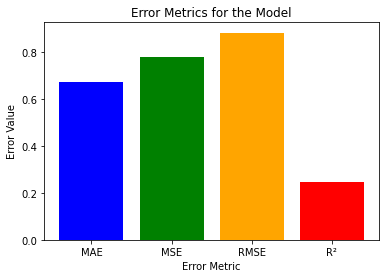

In [96]:
rmse = np.sqrt(mse)

# Create a bar chart to visualize the errors
errors = [mae, mse, rmse, r2]
error_labels = ['MAE', 'MSE', 'RMSE', 'R²']

plt.bar(error_labels, errors, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Error Metric')
plt.ylabel('Error Value')
plt.title('Error Metrics for the Model')
plt.show()